# <span style="color:darkred; font-family:'Times New Roman';"> Impact of Pit Stop Frequency on Constructors’ Performance </span>

<font size = "5">
<span style="font-family:Times New Roman" </span>

Section #1: Bobby Hu, Eric Zhao, Joy Qu, Lex Liu 

# <span style="color:darkred; font-family:'Times New Roman';"> Introduction </span>

<font size = "3">
<span style="font-family:Times New Roman" </span>

Formula One, or F1, is a major motorsport where drivers race high-speed, single-seat cars on tracks and closed city streets. Each race, called a Grand Prix, takes place at various circuits worldwide. Each season involves two main championships: the Drivers' Championship, for drivers, and the Constructors' Championship, for constructors, which are the teams behind the drivers. The championship title is awarded to the driver and the constructor with the most points. Points are awarded to the top ten finishing positions in each race.

The research question we are interested in is: How has pit stop frequency impacted constructors' race performance? Our research question is relevant because pit stops are necessary and are a crucial race strategy. Effective pit stops directly affect the driver's tire performance and pace, ultimately influencing constructors' race performance. To explore our research focus, we'll identify the top-performing constructors in the recent decade, 2011 to 2023. We'll measure the constructors' average pit stop frequency and examine its correlation to race position change, average lap time, and its variation among the top-performing constructors. Our visualizations and analyses conclude that pit stop frequency influences constructors' race performance but is not the sole factor behind top-performing constructors' competitive advantage. Moving forward, we can explore a weighted combination of pit stop frequency and other variables to measure how pit stop frequency, alongside various additional factors, strengthens its impact on constructors' race performance.

# <span style="color:darkred; font-family:'Times New Roman';"> Data Description </span>


<font size = "3">
<span style="font-family:Times New Roman" </span>

The dataset tables we plan to use include constructors, constructor_results, pit_stops, results, and lap_times. The constructors dataset contains 211 observations. Each row represents a constructor; the data contains the constructors' identification information. The constructor_results dataset contains 12,170 observations. Each row represents a constructor's race performance; the data contains identification and point information. The pit_stops dataset contains 9,634 observations. Each row represents a mid-race pit stop; the data contains pit stop duration and frequency information. The results dataset contains 25,840 observations. Each row represents a driver's race performance; the data contains the driver's identification, position, and lap information. The lap_times dataset contains 538,121 observations. Each row represents a driver's race lap time; the data contains the driver's identification and lap information. All of these datasets contain observations from the year 1950 to 2023. However, we focus on the 2011 to 2023 period, when the DRS (Drag Reduction System) technology was introduced to ensure consistent driver, constructor, and race performance data.

In [102]:
# Import the pandas library
import pandas as pd

# Import the matplotlib library
import matplotlib.pyplot as plt

# Import the statsmodels.api library
import statsmodels.api as sm

# Import the statsmodels.formula.api library
import statsmodels.formula.api as smf

In [103]:
# Read the 'constructors' dataset
constructors = pd.read_csv('data_raw/constructors.csv')

# Read the 'constructor_results' dataset
constructor_results = pd.read_csv('data_raw/constructor_results.csv')

# Read the 'pit_stops' dataset
pit_stops = pd.read_csv('data_raw/pit_stops.csv')

# Read the 'results' dataset
results = pd.read_csv('data_raw/results.csv')

# Read the 'lap_times' dataset
lap_times = pd.read_csv('data_raw/lap_times.csv')

In [104]:
print(f"The number of rows in constructors: {len(constructors)}")

print(f"The number of rows in constructor_results: {len(constructor_results)}")

print(f"The number of rows in pit_stops: {len(pit_stops)}")

print(f"The number of rows in results: {len(results)}")

print(f"The number of rows in lap_times: {len(lap_times)}")

The number of rows in constructors: 211
The number of rows in constructor_results: 12170
The number of rows in pit_stops: 9634
The number of rows in results: 25840
The number of rows in lap_times: 538121


# <span style="color:darkred; font-family:'Times New Roman';"> Merging </span>

<font size = "3">
<span style="font-family:Times New Roman" </span>

We first merged the constructor_results dataset with the constructors dataset to identify the points earned per constructor. We also merged the pit_stops dataset with the results dataset to determine the pit stop information per driver. Subsequently, the pit_stops and results dataset was merged with the constructors dataset to identify the driver's pit stop information per constructor. Before our third merge, we renamed the lap_times and results datasets' columns for clarification. Then, we merged the lap_times dataset with the results dataset to identify the lap time information per driver. Finally, the lap_times and results dataset was merged with the constructors dataset to identify the driver's lap time information per constructor, completing our initial merging procedures.

In [ ]:
# Merge 'constructor_results' with 'constructors'
c_and_cr = pd.merge(constructor_results, constructors, on='constructorId', how='left')

# Merge 'pit_stops' with 'results' to get constructors' driver information
ps_and_r = pd.merge(pit_stops, results, on=['raceId', 'driverId'], how='inner')

# Merge 'ps_and_r' with 'constructors' to get constructors' information
ps_r_and_c = pd.merge(ps_and_r, constructors, on='constructorId', how='left')

# Rename 'lap_times' columns
(lap_times.rename(columns=
                  {'position': 'position_lt', 'time': 'time_lt',
                   'milliseconds': 'milliseconds_lt'}, inplace=True))

# Rename 'results' columns
(results.rename(columns=
                {'position': 'position_r', 'time': 'time_r',
                 'milliseconds': 'milliseconds_r'}, inplace=True))

# Merge 'lap_times' with 'results' to get constructors' lap times
lt_and_r = pd.merge(lap_times, results, on=['raceId', 'driverId'], how='inner')

# Merge 'lt_and_r' with 'constructors' to get constructors' names
lt_r_and_c = pd.merge(lt_and_r, constructors, on='constructorId', how='left')

# <span style="color:darkred; font-family:'Times New Roman';"> Data Cleaning </span>

<font size = "3">
<span style="font-family:Times New Roman" </span>

Across all our merged datasets, we filtered the data to include races from 2011 to 2023, which corresponded to the 'raceID' values from 841 to 1120 and aligned with the introduction of the DRS technology, our research focus. Specific cleaning steps for each merged dataset varied based on our intended visualizations. To summarize our data cleaning procedures, we converted dataset columns to numeric values, filled missing data values with zeroes, and coerced any errors. We also renamed dataset columns for clarification and aggregated specific dataset variables for further merging procedures.

In [ ]:
# Part 1: The Total Number of Points Per Constructor
# Filter 'c_and_cr' for 2011 to 2023 constructors
c_cr_1123 = c_and_cr[(c_and_cr['raceId'] >= 841) & (c_and_cr['raceId'] <= 1120)]

# Coerce 'points' to numeric, filling NaN with 0
c_cr_1123['points'] = pd.to_numeric(c_cr_1123['points'], errors='coerce').fillna(0)

# Part 2: The Average Number of Pit Stops Per Race Per Constructor
# Filter 'ps_r_and_c' for 2011 to 2023 constructors
ps_r_c_1123 = ps_r_and_c[(ps_r_and_c['raceId'] >= 841) & (ps_r_and_c['raceId'] <= 1120)]

# Count the number of pit stops by constructor
total_pit_stop = ps_r_c_1123.groupby('name')['stop'].count().reset_index()

# Count the number of unique races by constructor
total_race = ps_r_c_1123.groupby('name')['raceId'].nunique().reset_index()

# Merge 'total_pit_stop' with 'total_race'
constructor_race = pd.merge(total_pit_stop, total_race, on='name')

# Rename 'constructor_race' columns
(constructor_race.rename(columns={'stop': 'total_pit_stop', 'raceId': 'total_race', 
                                  'name': 'constructor_name'}, inplace=True))

# Part 3: Average Lap Time And Average Number of Pit Stops
# Filter 'lt_r_and_c' for 2011 to 2023 constructors
lt_r_c_1123 = lt_r_and_c[(lt_r_and_c['raceId'] >= 841) & (lt_r_and_c['raceId'] <= 1120)]

/var/folders/tf/pxjm37j50t1f3zlbsrq8yt5h0000gn/T/ipykernel_90143/3128456975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_cr_1123['points'] = pd.to_numeric(c_cr_1123['points'], errors='coerce').fillna(0)


# <span style="color:darkred; font-family:'Times New Roman';"> Main Columns </span>

<font size = "3">
<span style="font-family:Times New Roman" </span>

Our main columns include the 'points' column from the constructor_results dataset, the 'stop' and 'milliseconds' columns from the pit_stops dataset, the 'grid' and 'positionOrder' columns from the results dataset, and the renamed 'milliseconds_lt' column from the lap_times dataset. The 'points' column describes the constructor's points per race. The 'stop' column describes the pit stop number, and the 'milliseconds' column describes the duration of pit stop in milliseconds. The 'grid' column describes the driver's starting grid position, and the 'positionOrder' column describes the driver's finishing position. The renamed 'milliseconds_lt' column describes the driver's lap time in milliseconds.

In [107]:
# Generate descriptive statistics for 'constructor_results'
(constructor_results[['points']].describe())

,points
count,12170.000000
mean,3.788661
std,7.427196
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,66.000000


In [108]:
# Generate descriptive statistics for 'pit_stops'
pit_stops[['stop', 'milliseconds']].describe()

,stop,milliseconds
count,9634.000000,9.634000e+03
mean,1.760536,7.240173e+04
std,0.914522,2.738340e+05
min,1.000000,1.289700e+04
25%,1.000000,2.190825e+04
50%,2.000000,2.355700e+04
75%,2.000000,2.618675e+04
max,6.000000,3.069017e+06


In [109]:
# Generate descriptive statistics for 'results'
results[['grid', 'positionOrder']].describe()

,grid,positionOrder
count,25840.000000,25840.000000
mean,11.179063,12.876006
std,7.243725,7.712391
min,0.000000,1.000000
25%,5.000000,6.000000
50%,11.000000,12.000000
75%,17.000000,18.000000
max,34.000000,39.000000


In [110]:
# Generate descriptive statistics for 'lap_times'
lap_times[['milliseconds_lt']].describe()

,milliseconds_lt
count,5.381210e+05
mean,9.572079e+04
std,7.477436e+04
min,5.540400e+04
25%,8.207100e+04
50%,9.067300e+04
75%,1.023190e+05
max,7.507547e+06


# <span style="color:darkred; font-family:'Times New Roman';"> Results </span>

<font size = "5">
<span style="font-family:Times New Roman" </span>

The Total Number of Points Per Constructor

In [111]:
# Sum the number of points per constructor
constructor_points = c_cr_1123.groupby('name')['points'].sum().reset_index()

# Rename 'constructor_points' columns
constructor_points.rename(columns={'name': 'constructor_name', 
                                   'points': 'total_points'}, inplace=True)

# Sort 'constructor_points' by 'total_points' in descending order
constructor_points.sort_values(by='total_points', ascending=False, inplace=True)

# Display 'constructor_points'
display(constructor_points)

,constructor_name,total_points
14,Mercedes,6599.5
16,Red Bull,5633.5
5,Ferrari,4776.5
13,McLaren,2154.0
6,Force India,1017.0
21,Williams,923.0
10,Lotus F1,706.0
17,Renault,532.0
19,Toro Rosso,431.0
2,Alpine F1 Team,328.0


<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

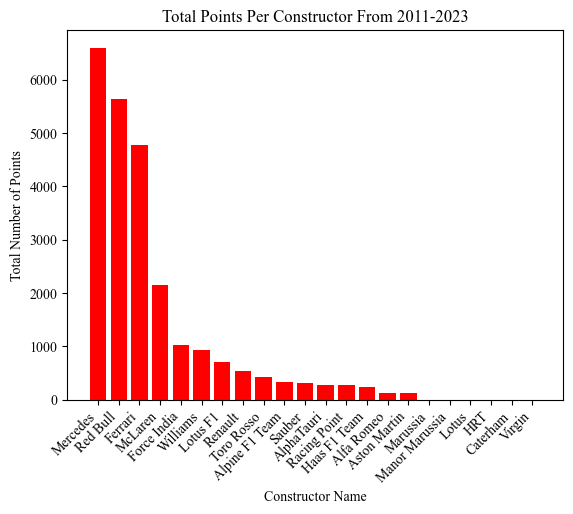

In [112]:
# Plot a bar chart of 'total_points' by 'constructor_name'
plt.bar(constructor_points['constructor_name'], constructor_points['total_points'], color='red')

# Add title and labels
plt.title('Total Points Per Constructor From 2011-2023', fontname='Times New Roman')
plt.xlabel('Constructor Name', fontname='Times New Roman')
plt.ylabel('Total Number of Points', fontname='Times New Roman')

# Rotate x-ticks and set font
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

# Set y-ticks font
plt.yticks(fontname='Times New Roman')

# Show the plot
plt.show()

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

<font size = "5">
<span style="font-family:Times New Roman" </span>

The Average Number of Pit Stops Per Race Per Constructor

In [113]:
# Calculate the number of pit stops per race per constructor
constructor_race['avg_race_pit'] = (constructor_race['total_pit_stop'] / 
                                              constructor_race['total_race'])

# Sort 'constructor_race' by 'avg_race_pit' in descending order
constructor_race.sort_values(by='avg_race_pit', ascending=False, inplace=True)

# Display 'constructor_race'
display(constructor_race)

,constructor_name,total_pit_stop,total_race,avg_race_pit
9,Lotus,85,18,4.722222
4,Caterham,241,55,4.381818
12,Marussia,233,54,4.314815
7,HRT,150,36,4.166667
20,Virgin,77,19,4.052632
21,Williams,950,237,4.008439
11,Manor Marussia,156,39,4.000000
16,Red Bull,942,239,3.941423
18,Sauber,621,158,3.930380
14,Mercedes,935,238,3.928571


<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

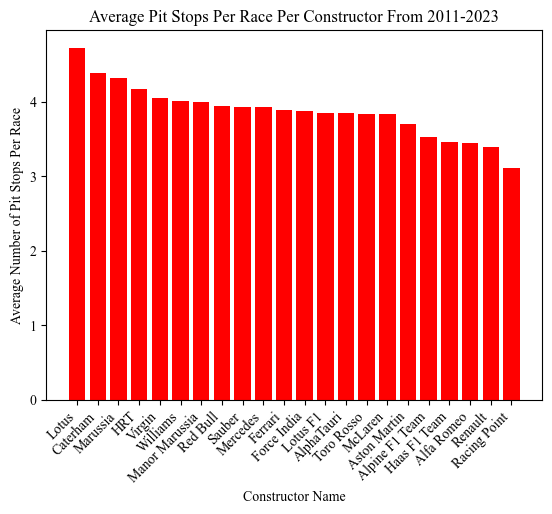

In [114]:
# Plot a bar chart of 'avg_race_pit' by 'constructor_name'
plt.bar(constructor_race['constructor_name'], constructor_race['avg_race_pit'], color='red')

# Add title and labels
plt.title('Average Pit Stops Per Race Per Constructor From 2011-2023', fontname='Times New Roman')
plt.xlabel('Constructor Name', fontname='Times New Roman')
plt.ylabel('Average Number of Pit Stops Per Race', fontname='Times New Roman')

# Rotate x-ticks and set font
plt.xticks(rotation=45, ha='right', fontname='Times New Roman')

# Set y-ticks font
plt.yticks(fontname='Times New Roman')

# Show the plot
plt.show()

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

<font size = "5">
<span style="font-family:Times New Roman" </span>

Average Lap Time Vs Average Number of Pit Stops

In [115]:
# Drop 'milliseconds_lt' rows with NaN values
lt_r_c_1123 = lt_r_c_1123.dropna(subset=['milliseconds_lt'])

# Calculate the average lap time per constructor
lt_r_c_avg = lt_r_c_1123.groupby('name')['milliseconds_lt'].mean().reset_index()

# Rename 'lt_r_c_avg' columns
lt_r_c_avg.rename(columns={'name': 'constructor_name',
                           'milliseconds_lt': 'avg_lap_ms'}, inplace=True)

# Merge 'lt_r_c_avg' with 'constructor_race'
lt_vs_ps = pd.merge(lt_r_c_avg, constructor_race[['constructor_name', 
                                                  'avg_race_pit']], on='constructor_name')

# Display 'lt_vs_ps'
display(lt_vs_ps)

,constructor_name,avg_lap_ms,avg_race_pit
0,Alfa Romeo,95726.256939,3.444444
1,AlphaTauri,98126.991083,3.847458
2,Alpine F1 Team,97720.742767,3.523810
3,Aston Martin,97796.171077,3.697674
4,Caterham,104473.131041,4.381818
5,Ferrari,97872.881627,3.882353
6,Force India,99999.891724,3.878981
7,HRT,110452.463342,4.166667
8,Haas F1 Team,96765.272733,3.454545
9,Lotus,111188.076602,4.722222


<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

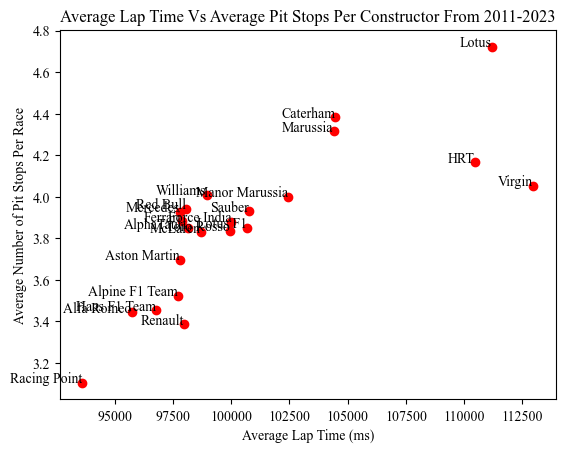

In [116]:
# Plot a scatterplot of 'avg_lap_ms' vs 'avg_race_pit'
plt.scatter(lt_vs_ps['avg_lap_ms'], lt_vs_ps['avg_race_pit'], color='red')

# Loop through 'lt_vs_ps'
for i, row in lt_vs_ps.iterrows():

# Add text labels to the scatterplot and set font
    plt.text(row['avg_lap_ms'], row['avg_race_pit'], row['constructor_name'], 
             ha='right', fontname='Times New Roman')

# Add title and labels
plt.title('Average Lap Time Vs Average Pit Stops Per Constructor From 2011-2023',
          fontname='Times New Roman')
plt.xlabel('Average Lap Time (ms)', fontname='Times New Roman')
plt.ylabel('Average Number of Pit Stops Per Race', fontname='Times New Roman')

# Set x-ticks font
plt.xticks(fontname='Times New Roman')

# Set y-ticks font
plt.yticks(fontname='Times New Roman')

# Show the plot
plt.show()

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

In [117]:
# Run the 'lap_vs_pit' regression
lap_vs_pit = (smf.ols(formula='avg_race_pit ~ avg_lap_ms', 
                             data=lt_vs_ps).fit())

# Print the 'lap_vs_pit' regression summary
print(lap_vs_pit.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_race_pit   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     29.73
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           2.45e-05
Time:                        11:57:18   Log-Likelihood:                 1.9543
No. Observations:                  22   AIC:                           0.09139
Df Residuals:                      20   BIC:                             2.273
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6155      1.008     -1.603      0.1

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

<font size = "5">
<span style="font-family:Times New Roman" </span>

Average Number of Pit Stops Vs Average Position Change

In [118]:
# Coerce 'grid' to numeric
results['grid'] = pd.to_numeric(results['grid'], errors='coerce')

# Coerce 'positionOrder' to numeric
results['positionOrder'] = pd.to_numeric(results['positionOrder'], errors='coerce')

# Calculate 'position_change' as 'grid' - 'positionOrder'
results['position_change'] = results['grid'] - results['positionOrder']

# Group 'pit_stops' by 'raceId' and 'driverId'
pit_stop_count = (pit_stops.groupby(['raceId', 'driverId'])
                   
# Count 'pit_stops' per race per driver
                   .size()

# Reset index and name 'pit_stop_count'
                   .reset_index(name='pit_stop_count'))

# Merge 'pit_stop_count' with 'results'
position_pit = (pit_stop_count.merge(results[['raceId', 'driverId', 
                                             'constructorId', 'position_change']],
                                             on=['raceId', 'driverId'], how='inner')

# Merge 'pit_stop_count' and 'results' with 'constructors'
              .merge(constructors[['constructorId', 'name']], on='constructorId', how='left'))

# Filter 'position_pit' for 2011 to 2023 constructors
position_pit_1123 = position_pit[(position_pit['raceId'] >= 841) & 
                                  (position_pit['raceId'] <= 1120)]

# Group 'position_pit_1123' by 'name'
ps_vs_pc = (position_pit_1123.groupby('name')
                   
# Calculate 'pit_stop_count' average
                      .agg(avg_pit_stop = ('pit_stop_count', 'mean'),
                           
# Calculate 'position_change' average
                           avg_position_change = ('position_change', 'mean'))

# Reset index
                           .reset_index())

# Display 'ps_vs_pc'
display(ps_vs_pc)

,name,avg_pit_stop,avg_position_change
0,Alfa Romeo,1.811688,0.435065
1,AlphaTauri,2.045045,-0.864865
2,Alpine F1 Team,1.873418,0.835443
3,Aston Martin,1.939024,1.231707
4,Caterham,2.434343,2.232323
5,Ferrari,2.071749,0.069507
6,Force India,2.064407,0.793220
7,HRT,2.238806,2.656716
8,Haas F1 Team,1.878327,-0.368821
9,Lotus,2.361111,1.166667


<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

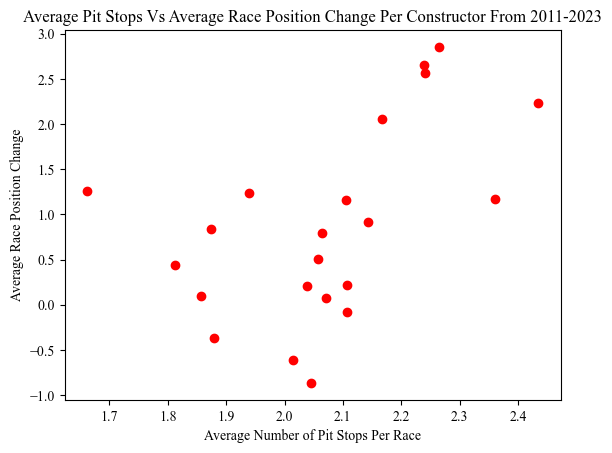

In [119]:
# Plot a scatterplot of 'avg_pit_stop' vs 'avg_position_change'
plt.scatter(ps_vs_pc['avg_pit_stop'],
            ps_vs_pc['avg_position_change'], color='red')

# Add title and labels
plt.title('Average Pit Stops Vs Average Race Position Change Per Constructor From 2011-2023',
          fontname='Times New Roman')
plt.xlabel('Average Number of Pit Stops Per Race', fontname='Times New Roman')
plt.ylabel('Average Race Position Change', fontname='Times New Roman')

# Set x-ticks font
plt.xticks(fontname='Times New Roman')

# Set y-ticks font
plt.yticks(fontname='Times New Roman')

# Show the plot
plt.show()

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

In [120]:
# Run the 'pit_vs_position' regression
pit_vs_position = (smf.ols(formula='avg_position_change ~ avg_pit_stop', 
                             data=ps_vs_pc).fit())

# Print the 'pit_vs_position' regression summary
print(pit_vs_position.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_position_change   R-squared:                       0.261
Model:                             OLS   Adj. R-squared:                  0.224
Method:                  Least Squares   F-statistic:                     7.060
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):             0.0151
Time:                         11:57:18   Log-Likelihood:                -28.760
No. Observations:                   22   AIC:                             61.52
Df Residuals:                       20   BIC:                             63.70
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.2478      2.314    

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

<font size = "5">
<span style="font-family:Times New Roman" </span>

Average Pit Stop Time Vs Average Position Change

In [121]:
# Coerce 'milliseconds' to numeric
pit_stops['milliseconds'] = pd.to_numeric(pit_stops['milliseconds'], errors='coerce')

# Group 'pit_stops' by 'raceId' and 'driverId'
# Calculate 'milliseconds' average (per driver per race)
time_position_1123 = (pit_stops.groupby(['raceId', 'driverId'])['milliseconds'].mean()
                  
# Reset index and name 'avg_pit_ms'
                  .reset_index(name='pit_ms')

# Merge 'pit_stops' with 'results'
                  .merge(results[['raceId','driverId','constructorId','position_change']], 
                         on=['raceId','driverId'])
                  
# Merge 'pit_stops' and 'results' subset with 'constructors'
                  .merge(constructors[['constructorId','name']], on='constructorId')
                  
# Filter for 2011 to 2023 constructors
                  .query('841 <= raceId <= 1120'))

# Group 'time_position_1123' by 'name'
pt_vs_pc = (time_position_1123.groupby('name')
                      
# Calculate 'pit_ms' average (per constructor)
                      .agg(avg_pit_ms = ('pit_ms','mean'),
                           
# Calculate 'position_change' average
                           avg_position_change = ('position_change','mean'))
                           
# Reset index
                           .reset_index())

# Display 'pt_vs_pc'
display(pt_vs_pc)

,name,avg_pit_ms,avg_position_change
0,Alfa Romeo,112414.162554,0.435065
1,AlphaTauri,140557.493994,-0.864865
2,Alpine F1 Team,148138.206118,0.835443
3,Aston Martin,130893.461789,1.231707
4,Caterham,29820.589394,2.232323
5,Ferrari,62518.006016,0.069507
6,Force India,44478.394689,0.793220
7,HRT,33055.399751,2.656716
8,Haas F1 Team,76871.368251,-0.368821
9,Lotus,24663.530556,1.166667


<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

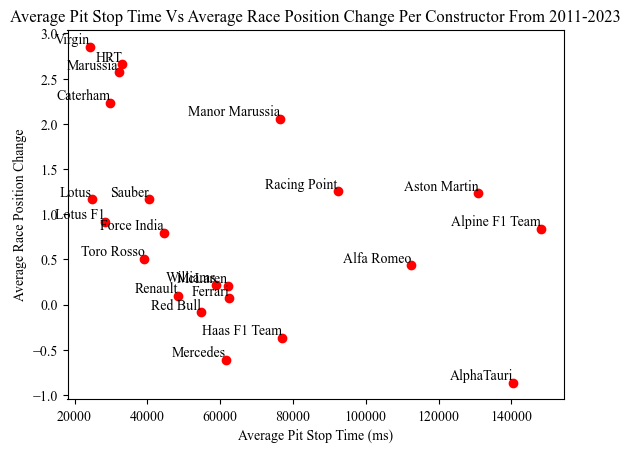

In [122]:
# Plot a scatterplot of 'avg_pit_ms' vs 'avg_position_change'
plt.scatter(pt_vs_pc['avg_pit_ms'], pt_vs_pc['avg_position_change'], color='red')

# Loop through 'pt_vs_pc'
for _, r in pt_vs_pc.iterrows():

# Add text labels to the scatterplot and set font
    plt.text(r.avg_pit_ms, r.avg_position_change,
             r['name'], ha='right', va='bottom', fontname='Times New Roman')

# Add title and labels
plt.title('Average Pit Stop Time Vs Average Race Position Change Per Constructor From 2011-2023',
          fontname='Times New Roman')
plt.xlabel('Average Pit Stop Time (ms)', fontname='Times New Roman')
plt.ylabel('Average Race Position Change', fontname='Times New Roman')

# Set x-ticks font
plt.xticks(fontname='Times New Roman')

# Set y-ticks font
plt.yticks(fontname='Times New Roman')

# Show the plot
plt.show()

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

In [123]:
# Run the 'time_vs_position' regression
time_vs_position = (smf.ols(formula='avg_position_change ~ avg_pit_ms', 
                             data=pt_vs_pc).fit())

# Print the 'time_vs_position' regression summary
print(time_vs_position.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_position_change   R-squared:                       0.158
Model:                             OLS   Adj. R-squared:                  0.116
Method:                  Least Squares   F-statistic:                     3.751
Date:                 Sat, 26 Apr 2025   Prob (F-statistic):             0.0670
Time:                         11:57:18   Log-Likelihood:                -30.195
No. Observations:                   22   AIC:                             64.39
Df Residuals:                       20   BIC:                             66.57
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5982      0.429      3.72

<font size = "3">
<span style="font-family:Times New Roman" </span>

markdown text explaining what the findings are

# <span style="color:darkred; font-family:'Times New Roman';"> Discussion </span>

<font size = "3">
<span style="font-family:Times New Roman" </span>

Provide a brief 1 paragraph markdown chunk summarizing your findings.
Describe the main things you learned from the data.